# Import the libraries

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\Qadri\Pictures\bhai data\spam.csv', encoding='ISO-8859-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1781,ham,";-( oh well, c u later",NaN,NaN,NaN
2498,ham,"I know where the &lt;#&gt; is, I'll be there...",NaN,NaN,NaN
4877,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...,NaN,NaN,NaN
4053,ham,dont make ne plans for nxt wknd coz she wants ...,NaN,NaN,NaN
658,ham,It doesnt make sense to take it there unless i...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
##Data Cleaning
##EDA
##Text Preprocessing
##Model Building
##Evaluation 
##improvement
##Website 
##Deploy

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
#print(df.columns)
# Check if the columns exist before trying to drop them
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Filter the list of columns to drop to only include existing columns
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(columns=columns_to_drop, inplace=True)

# Print the updated column names
print(df.columns)


Index(['v1', 'v2'], dtype='object')


In [15]:
#Renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
4092,ham,"\Life is nothing wen v get everything\"". But \..."
4813,ham,Ummmmmaah Many many happy returns of d day my ...
3673,spam,You have won a Nokia 7250i. This is what you g...
2629,ham,Hey there! Glad u r better now. I hear u treat...
3306,ham,Set a place for me in your heart and not in yo...


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
df['target']=le.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
##Check for duplicate values
df.duplicated().sum()

403

In [21]:
##Remove Duplicates
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [22]:
df.shape

(5572, 2)

# 2- EDA

In [44]:
df.head()

,target,text,num_alphabets,num of words,num of sentences,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [45]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x24ae125b350>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

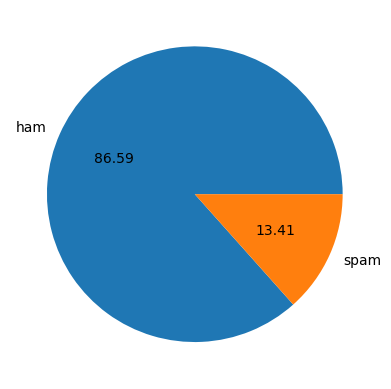

In [46]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [47]:
#Data is imbalanced
import nltk

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Qadri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
df['num_alphabets']=df['text'].apply(len)

In [50]:
df.head()

,target,text,num_alphabets,num of words,num of sentences,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [51]:
##num of words
df['num_of_words']=df['text'].apply(lambda x:nltk.word_tokenize(x))

In [52]:
df['num_of_words']

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: num_of_words, Length: 5572, dtype: object

In [53]:
df.head()

,target,text,num_alphabets,num of words,num of sentences,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [54]:
df['num_of_sentences']=df['text'].apply(lambda x:nltk.word_tokenize(x))
df.head()

,target,text,num_alphabets,num of words,num of sentences,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [55]:
df['num_of_sentences']

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: num_of_sentences, Length: 5572, dtype: object

In [56]:
df[['num_alphabets','num_of_words','num_of_sentences']].describe()

,num_alphabets
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [ ]:
df[df['target']]